In [37]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ os.path.join(path_to_dir,filename) for filename in filenames if filename.endswith( suffix ) ]
files_with_hawk = find_csv_filenames(os.path.join(".","data","with-hawk"))
files_without_hawk = find_csv_filenames(os.path.join(".","data","without-hawk"))

In [44]:
all_df = pd.DataFrame()
for file in files_with_hawk + files_without_hawk:
    df = pd.read_csv(file)
    df["Run"] = int(os.path.basename(file)[0])+1
    df["Hawk"] = os.path.basename(os.path.split(file)[-2])
    df["Seconds"] = df["Timestamp"] - df["Timestamp"][0]

    all_df = pd.concat([all_df,df])

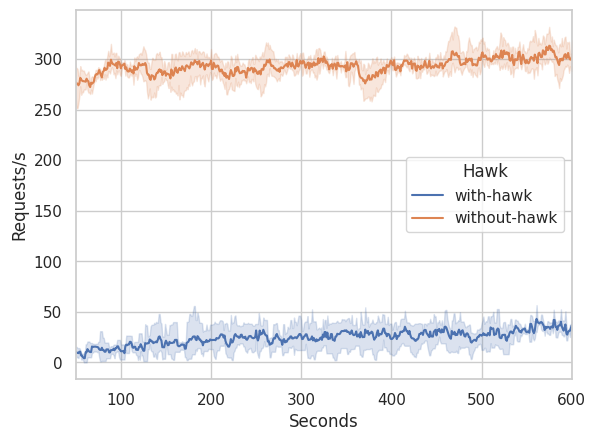

In [45]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Seconds", 
             y="Requests/s",
             hue="Hawk", 
             #style="Run",
             data=all_df)
plt.xlim((50,600))
plt.savefig(os.path.join(".","data","fig","throughput_100_user_10_min.pdf"))

In [60]:
average_throughput_hawk = all_df[all_df["Hawk"]=="with-hawk"]["Requests/s"].mean()
print(average_throughput_hawk)
average_throughput_without_hawk = all_df[all_df["Hawk"]=="without-hawk"]["Requests/s"].mean()
print(average_throughput_without_hawk)

23.298437788685526
288.83029848863004


<Axes: xlabel='Second', ylabel='Total Average Response Time'>

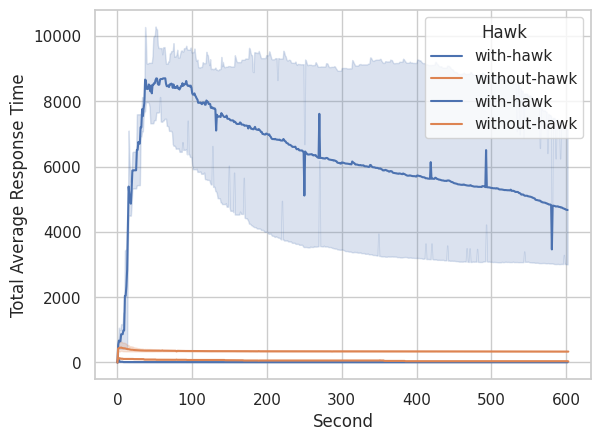

In [35]:
sns.lineplot(x="Second", 
             y="Total Average Response Time",
             hue="Hawk", 
             #style="Run",
             data=all_df)
#sns.lineplot(x="Second", 
#             y="Total Min Response Time",
#             hue="Hawk", 
#             #style="Run",
#             data=all_df)


In [65]:
increase_with_hawk = find_csv_filenames(os.path.join(".","data","increase-with-hawk"))
all_df = pd.DataFrame()
for file in increase_with_hawk:
    df = pd.read_csv(file)
    df["Run"] = int(os.path.basename(file)[0])+1
    df["Hawk"] = os.path.basename(os.path.split(file)[-2])
    df["Seconds"] = df["Timestamp"] - df["Timestamp"][0]

    all_df = pd.concat([all_df,df])

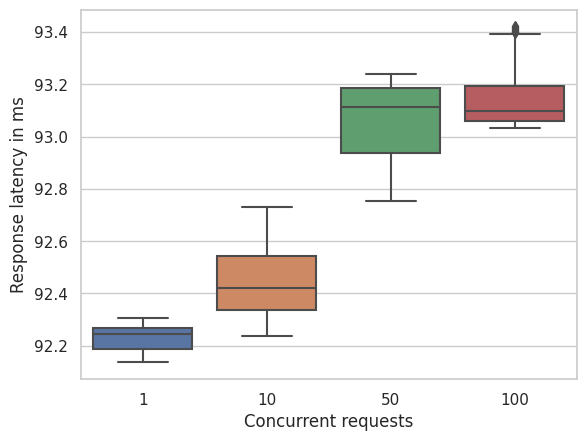

In [67]:
all_df = all_df[all_df["User Count"]>=1]
ax = sns.boxplot( x=all_df["User Count"], y=all_df["Collector_ms_Latency"] )
ax.set(xlabel="Concurrent requests",ylabel="Response latency in ms")
plt.savefig(os.path.join(".","data","fig","collector_latency.pdf"))

In [87]:
increase_with_hawk = find_csv_filenames(os.path.join(".","data","increase-with-hawk"))
increase_without_hawk = find_csv_filenames(os.path.join(".","data","increase-without-hawk"))
all_df = pd.DataFrame()
for file in increase_with_hawk + increase_without_hawk:
    df = pd.read_csv(file)
    df["Run"] = int(os.path.basename(file)[0])+1
    df["Hawk"] = os.path.basename(os.path.split(file)[-2])#.split("-")[1::2]
    df["Seconds"] = df["Timestamp"] - df["Timestamp"][0]

    all_df = pd.concat([all_df,df])

(50.0, 240.0)

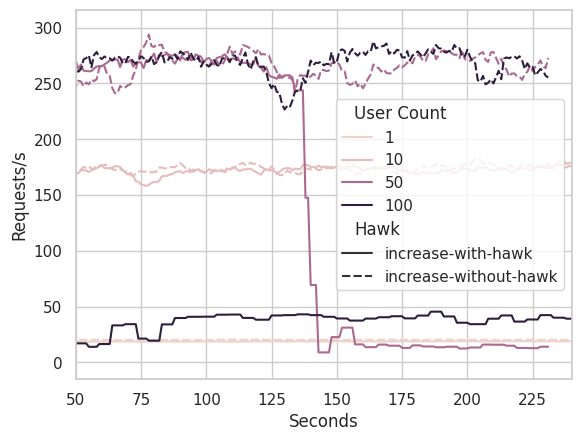

In [88]:
all_df = all_df[all_df["User Count"]>=1]
sns.set_palette("YlGnBu")
sns.set_theme(style="whitegrid")
sns.lineplot(x="Seconds", 
             y="Requests/s",
             hue="User Count", 
             style="Hawk",
             data=all_df)
plt.xlim((50,240))

[Text(0.5, 0, 'Concurrent requests'), Text(0, 0.5, 'Requests/s')]

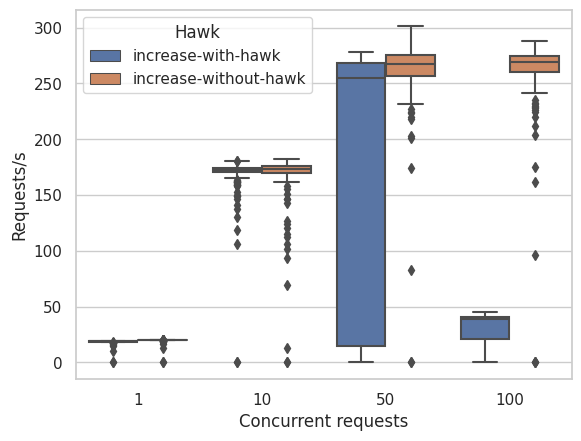

In [89]:
ax = sns.boxplot( x=all_df["User Count"], y=all_df["Requests/s"] ,hue=all_df["Hawk"])
ax.set(xlabel="Concurrent requests",ylabel="Requests/s")
#plt.savefig(os.path.join(".","data","fig","collector_latency.pdf"))